# Module 6: Data types and tidy data

## Tidy data

Let's do some tidy exercise first. This is one of the non-tidy dataset assembled by Hadley Wickham (check out [here](https://github.com/tidyverse/tidyr/tree/master/vignettes) for more datasets, explanation, and R code). 

Let's take a look at this small dataset: https://raw.githubusercontent.com/tidyverse/tidyr/master/vignettes/pew.csv

In [1]:
import pandas as pd
print(pd.__version__)

0.23.4


In [2]:
pew_df = pd.read_csv('https://raw.githubusercontent.com/tidyverse/tidyr/master/vignettes/pew.csv')
pew_df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


This dataset is about the relationships between income and religion, assembled from a research by the Pew Research Center. You can read more details [here](https://github.com/tidyverse/tidyr/blob/master/vignettes/tidy-data.Rmd#column-headers-are-values-not-variable-names). Is this dataset tidy or not? Why?

Yes, many of the columns are values, not variable names. How should we fix it? 

Pandas provides a convenient function called [melt](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html). You specify the `id_vars` that are variable columns, and `value_vars` that are value columns, and provide the name for the variable as well as the name for the values. 

**Q: so please go ahead and tidy it up! I'd suggest to use the variable name "income" and value name "frequency"**

In [3]:
# TODO: put your code here
pew_tidy_df =pd.melt(pew_df, id_vars=['religion'], 
                     value_vars=['<$10k','$10-20k','$20-30k', '$30-40k', '$40-50k', '$50-75k', '$75-100k','$100-150k','>150k','Don\'t know/refused'], 
                     var_name='income', 
                     value_name='frequency')


If you were successful, you'll have something like this:

In [4]:
pew_tidy_df.sample(10)

,religion,income,frequency
3,Catholic,<$10k,418
143,Unaffiliated,$100-150k,321
121,Orthodox,$75-100k,38
2,Buddhist,<$10k,27
5,Evangelical Prot,<$10k,575
134,Jehovah's Witness,$100-150k,11
158,Other Christian,>150k,12
124,Other World Religions,$75-100k,3
151,Historically Black Prot,>150k,78
19,Atheist,$10-20k,27


## Data types

Let's talk about data types briefly. Understanding data types is not only important for choosing the right visualizations, but also important for efficient computing and storage of data. You may not have thought about how pandas represent data in memory. A Pandas `Dataframe` is essentially a bunch of `Series`, and those `Series` are essentially `numpy` arrays. An array may contain a fixed-length items such as integers or variable length items such as strings. Putting some efforts to think about the correct data type can potentially save a lot of memory as well as time. 

A nice example would be the categorical data type. If you have a variable that only has several possible values, it's essentially a categorical data. Take a look at the `income` variable. 

In [5]:
pew_tidy_df.income.value_counts()

$100-150k             18
$50-75k               18
$75-100k              18
>150k                 18
<$10k                 18
$10-20k               18
$40-50k               18
$30-40k               18
Don't know/refused    18
$20-30k               18
Name: income, dtype: int64

These were the column names in the original messy data. The value can take only one of these income ranges and thus it is a categorical data. What is the data type that pandas use to store this column?

In [6]:
pew_tidy_df.income.dtype

dtype('O')

The `O` means that it is an object data type, which does not have a fixed size like integer or float. The series contains a sort of pointer to the actual text objects. You can actually inspect the amount of memory used by the dataset. 

In [7]:
pew_tidy_df.memory_usage()

Index          80
religion     1440
income       1440
frequency    1440
dtype: int64

In [8]:
pew_tidy_df.memory_usage(deep=True)

Index           80
religion     12780
income       14940
frequency     1440
dtype: int64

What's going on with the `deep=True` option? When you don't specify `deep=True`, the memory usage method just tells you the amount of memory used by the numpy arrays in the pandas dataframe. When you pass `deep=True`, it tells you the total amount of memory by including the memory used by all the text objects. So, the `religion` and `income` columns occupies almost ten times of memory than the `frequency` column, which is simply an array of integers. 

In [9]:
pew_tidy_df.frequency.dtype

dtype('int64')

Is there any way to save up the memory? Note that there are only 10 categories in the income variable. That means we just need 10 numbers to represent the categories! Of course we need to store the names of each category, but that's just one-time cost. The simplest way to convert a column is using `astype` method. 

In [10]:
income_categorical_series = pew_tidy_df.income.astype('category')
# you can do pew_tidy_df.income = pew_tidy_df.income.astype('category')

Now, this series has the `CategoricalDtype` dtype. 

In [11]:
income_categorical_series.dtype

CategoricalDtype(categories=['$10-20k', '$100-150k', '$20-30k', '$30-40k', '$40-50k',
                  '$50-75k', '$75-100k', '<$10k', '>150k',
                  'Don't know/refused'],
                 ordered=False)

How much memory do we use?

In [12]:
income_categorical_series.memory_usage(deep=True)

1410

In [13]:
pew_tidy_df.income.memory_usage(deep=True)

15020

We have reduced the memory usage by almost 10 fold! Not only that, because now the values are just numbers, it will be much faster to match, filter, manipulate. If your dataset is huge, this can save up a lot of space and time. 

If the categories have ordering, you can specify the ordering too. 

In [14]:
from pandas.api.types import CategoricalDtype


In [15]:
income_type = CategoricalDtype(
    categories=['Don\'t know/refused', '<$10k', '$10-20k', '$20-30k', '$30-40k','$40-50k', '$50-75k', '$75-100k', '$100-150k', '>150k'], 
    ordered=True)
income_type

CategoricalDtype(categories=['Don't know/refused', '<$10k', '$10-20k', '$20-30k',
                  '$30-40k', '$40-50k', '$50-75k', '$75-100k', '$100-150k',
                  '>150k'],
                 ordered=True)

In [16]:
pew_tidy_df.income.astype(income_type).dtype

CategoricalDtype(categories=['Don't know/refused', '<$10k', '$10-20k', '$20-30k',
                  '$30-40k', '$40-50k', '$50-75k', '$75-100k', '$100-150k',
                  '>150k'],
                 ordered=True)

This data type now allows you to compare and sort based on the ordering. 

**Q: ok, now convert both religion and income columns of `pew_tidy_df` as categorical dtype (in place) and show that `pew_tidy_df` now uses much less memory**

In [17]:
# Convert income to income_type category
pew_tidy_df.income = pew_tidy_df.income.astype(income_type)
# show memory usage
pew_tidy_df.income.memory_usage(deep=True)


1230

In [18]:
#Find unique values for religion
religion_list=pew_tidy_df.religion.unique()
religion_list

array(['Agnostic', 'Atheist', 'Buddhist', 'Catholic',
       'Don’t know/refused', 'Evangelical Prot', 'Hindu',
       'Historically Black Prot', "Jehovah's Witness", 'Jewish',
       'Mainline Prot', 'Mormon', 'Muslim', 'Orthodox', 'Other Christian',
       'Other Faiths', 'Other World Religions', 'Unaffiliated'],
      dtype=object)

In [19]:
#create religion_type
religion_type=CategoricalDtype(categories=religion_list, ordered= True)
religion_type

CategoricalDtype(categories=['Agnostic', 'Atheist', 'Buddhist', 'Catholic',
                  'Don’t know/refused', 'Evangelical Prot', 'Hindu',
                  'Historically Black Prot', 'Jehovah's Witness', 'Jewish',
                  'Mainline Prot', 'Mormon', 'Muslim', 'Orthodox',
                  'Other Christian', 'Other Faiths', 'Other World Religions',
                  'Unaffiliated'],
                 ordered=True)

In [20]:
# Convert religion to religion_type category
pew_tidy_df.religion = pew_tidy_df.religion.astype(religion_type)
# show memory usage
pew_tidy_df.religion.memory_usage(deep=True)

2199

## If you want to know more

- [Jean-Nicholas Hould: Tidy Data in Python](http://www.jeannicholashould.com/tidy-data-in-python.html)
- [Stephen Simmons | Pandas from the Inside](https://www.youtube.com/watch?v=CowlcrtSyME)
- [Data school: How do I make my pandas DataFrame smaller and faster?](https://www.youtube.com/watch?v=wDYDYGyN_cw)

In [25]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [26]:
chart = alt.Chart(pew_tidy_df)

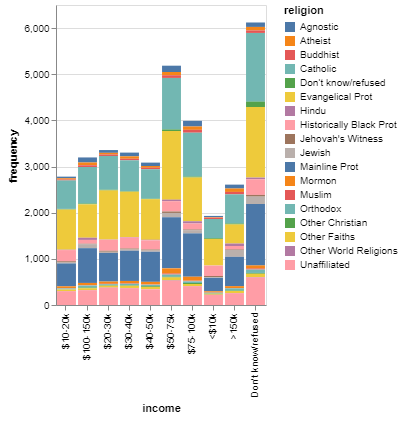

In [27]:
source = pew_tidy_df

alt.Chart(source).mark_bar().encode(
    x='income',
    y='frequency',
    color='religion'
)

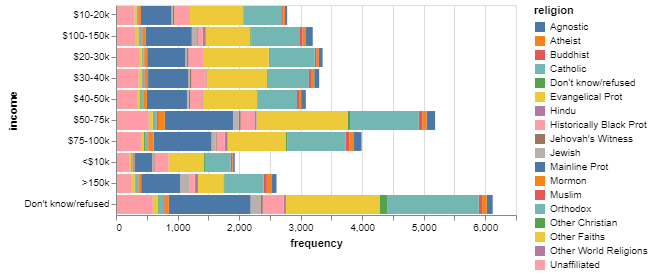

In [28]:
alt.Chart(source).mark_bar().encode(
    y='income',
    x='frequency',
    color='religion'
)

In [29]:
alt.Chart(source).mark_bar().encode(
    y='income',
    x='frequency',
    color='religion'
).save('m06_results_yezeret_helen_1.html')